In [1]:
import matplotlib.pyplot as plt
import pylab as pl
import pandas as pd
import io
import numpy as np
import scipy as scipy
import math 
from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline, BSpline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
from matplotlib import rc #Para usar la fuente de Latex
import re

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Times"]})

%matplotlib inline

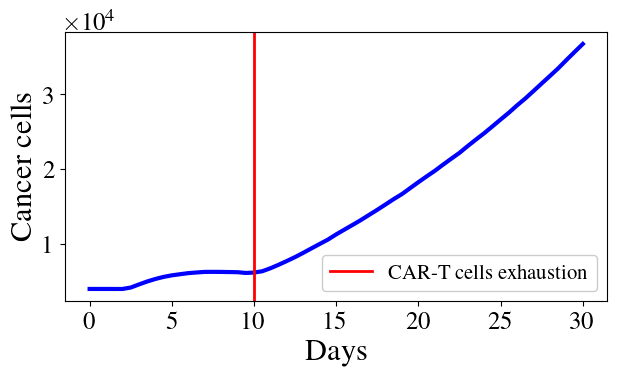

In [12]:
# Load data and create a column with the cumulative sum of the cells
# a: Time
# b: Tumour Volume
# c: Tumour Volume
# d: Tumour radius
# e: Cancer cells
# f: Dead lymphocytes
# g: Dead cancer cells
# h: All cells
# i: Cummulative sum of Dead cancer cells

data1 = pd.read_csv('./DatosFinales.dat', sep=" ", skiprows=2, header=None)
data1.columns = ["a", "b", "c", "d", "e", "f", "g", "h"]
data1["i"] = data1["g"].cumsum()


fig, ax1 = plt.subplots(figsize=(7, 3.5))

n = 7
colors = pl.cm.gnuplot_r(np.linspace(0,1,n))

ax1.plot(data1.a/1440, data1.e, linewidth=3, linestyle="-", color="Blue")


ax1.axvline(10, color='red', ls='-', lw=2, label="CAR-T cells exhaustion")

ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.set_xlabel("Days", fontsize=22)
ax1.set_ylabel("Cancer cells", fontsize=22)
ax1.legend(framealpha=1, frameon=True, fontsize=15, loc = 'lower right', ncol=1)
plt.rc('font', **{'size':'18'})

plt.show()



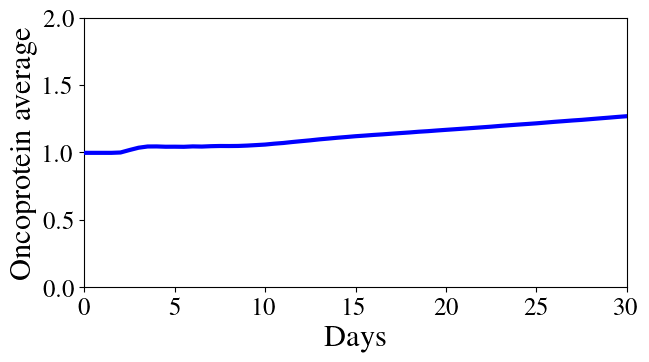

In [20]:
#Plot Oncoprotein

dias = [0,719,1439,2160,2880,3600,4320,5040,5760,6480,7200,7920,8640,9360,10080,10800,11520,12240,12960,13680,14400,15120,15840,16560,17280,18000,18719,19439,20159,20879,21599,22319,23039,23759,24479,25199,25919,26639,27359,28079,28799,29519,30239,30959,31679,32399,33119,33839,34559,35279,35999,36719,37439,38159,38879,39599,40319,41039,41759,42479,43199]

x = []
onco_dias = []

for i in range(0,len(dias)):
    path = 'Datos_{}.xyz'.format(dias[i])

    data2 = pd.read_csv('./'+path+'', sep=" ", skiprows=1, header=None)
    data2.columns = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q"]

    onco=0
    suma=0
    
    for j in range(0,len(data2.m)):
        if data2.m[j] > 0 and data2.m[j] < 5:
            suma = suma + 1
            onco = onco + data2.i[j]

    x.append(dias[i]/1440)
    onco_dias.append(onco/suma)

fig, ax13 = plt.subplots(figsize=(7,3.5))


ax13.plot(x, onco_dias, linewidth=3, linestyle="-", color = 'Blue', zorder = 10)


ax13.tick_params(axis='both', which='major', labelsize=18)
ax13.set_ylabel('Oncoprotein average',fontsize=22)
ax13.set_xlabel('Days',fontsize=22)
ax13.tick_params(axis='both', which='major', labelsize=18)
ax13.set_ylim(0,2)
ax13.set_xlim(0,30)

plt.show()
    

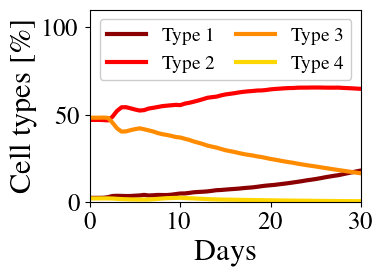

In [19]:
#Plot Cell types

dias = [0,719,1439,2160,2880,3600,4320,5040,5760,6480,7200,7920,8640,9360,10080,10800,11520,12240,12960,13680,14400,15120,15840,16560,17280,18000,18719,19439,20159,20879,21599,22319,23039,23759,24479,25199,25919,26639,27359,28079,28799,29519,30239,30959,31679,32399,33119,33839,34559,35279,35999,36719,37439,38159,38879,39599,40319,41039,41759,42479,43199]

cantidades_1_00 = []
cantidades_2_00 = []
cantidades_3_00 = []
cantidades_4_00 = []
x = []

for i in range(0,len(dias)):            
    name = []
    path = 'Datos_{}.xyz'.format(dias[i])            

    name = pd.read_csv('./'+path+'', sep=" ", skiprows=1, header=None)
    name.columns = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q"]

    suma1 = 0
    suma2 = 0
    suma3 = 0
    suma4 = 0
    suma0 = 0

    for j in range(0, len(name)):

        if name.m[j] == 1:
            suma1 = suma1 + 1            
        elif name.m[j] == 2:
            suma2 = suma2 + 1            
        elif name.m[j] == 3:
            suma3 = suma3 + 1            
        elif name.m[j] == 4:
            suma4 = suma4 + 1            
        elif name.m[j] == 0:
            suma0 = suma0 + 1

    cantidades_1_00.append(100*suma1/(suma1+suma2+suma3+suma4))
    cantidades_2_00.append(100*suma2/(suma1+suma2+suma3+suma4))
    cantidades_3_00.append(100*suma3/(suma1+suma2+suma3+suma4))
    cantidades_4_00.append(100*suma4/(suma1+suma2+suma3+suma4))
    x.append(dias[i]/1440)
    
    
fig, ax14 = plt.subplots(figsize=(3.5,2.5))

ax14.plot(x, cantidades_1_00, color="darkred", linewidth=3, label="Type 1")

ax14.plot(x, cantidades_2_00, color="red", linewidth=3, label="Type 2")

ax14.plot(x, cantidades_3_00, color="darkorange", linewidth=3, label="Type 3")

ax14.plot(x, cantidades_4_00, color="gold", linewidth=3, label="Type 4")

ax14.legend(framealpha=1, frameon=True, fontsize=14, loc = 'upper right',ncol=2, mode = "expand")
ax14.tick_params(axis='both', which='major', labelsize=18)
ax14.set_ylim(0,110)
ax14.set_xlim(0,30)
ax14.set_ylabel('Cell types [\%]',fontsize=22)
ax14.set_xlabel('Days',fontsize=22)

#plt.savefig('./FigurasFinales/Figura1/Tipos025.png', format='png', dpi=500, bbox_inches='tight')

plt.show()